# Tasca M5 T01

### Descripció
### **Exercicis d'Hipotesis Testing.**

### - **Exercici 1**
Descarrega el dataset adjunt de dades oficials de la UEFA i selecciona un atribut del conjunt de dades. Calcula el p-valor i digues si rebutja la hipòtesi nul·la agafant un alfa de 5%. 

In [1]:
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv("C:/Users/julia/DATA SCIENCE IT/SPRINT 5/Lligues europees UEFA.csv", sep=';', encoding='latin1')

In [20]:
data.head(10)

,Rk,Squad,Country,LgRk,MP,W,D,L,GF,GA,...,Pts/G,xG,xGA,xGD,xGD/90,Last 5,Attendance,Goalkeeper,Top_Team_Scorer,Goals_scored
0,1,Manchester City,ENG,1,37,28,6,3,96,24,...,2.43,86.1,26.8,59.3,1.60,W W W W D,52739,Ederson,Kevin De Bruyne,15
1,2,Liverpool,ENG,2,36,26,8,2,89,24,...,2.39,84.6,33.1,51.4,1.43,W W W D W,53367,Alisson,Mohamed Salah,22
2,3,Real Madrid,ESP,1,37,26,7,4,80,31,...,2.30,73.0,45.8,27.2,0.73,W W L W D,40624,Thibaut Courtois,Karim Benzema,27
3,4,Bayern Munich,GER,1,34,24,5,5,97,37,...,2.26,88.1,37.1,51.0,1.50,W W L D D,33176,Manuel Neuer,Robert Lewandowski,35
4,5,Paris S-G,FRA,1,37,25,8,4,85,36,...,2.24,71.6,38.1,33.4,0.90,W D D D W,41188,Keylor Navas,Kylian Mbappé,25
5,6,Milan,ITA,1,37,25,8,4,66,31,...,2.24,60.0,34.4,25.6,0.69,W W W W W,42388,Mike Maignan,Rafael Leão,11
6,7,Inter,ITA,2,37,24,9,4,81,32,...,2.19,78.1,38.2,39.9,1.08,W L W W W,41995,Samir Handanovi?,Lautaro Martínez,21
7,8,Napoli,ITA,3,37,23,7,7,71,31,...,2.05,58.5,29.9,28.6,0.77,D L W W W,26681,David Ospina,Victor Osimhen,14
8,9,Dortmund,GER,2,34,22,3,9,85,52,...,2.03,62.8,43.2,19.6,0.58,W L L W W,41800,Gregor Kobel,Erling Haaland,22
9,10,Barcelona,ESP,2,37,21,10,6,68,36,...,1.97,61.3,35.2,26.1,0.71,L W W W D,53933,Marc-André ter Stegen,Memphis Depay,12


El dataframe/taula ens mostra informació i estadistiques d'una lliga de fubtol en els diferents equips que hi participen:
- **Rk**: Ranking
- **Squad**: Nom de l'equip de futbol.
- **Country**: País de l'equip de futbol.
- **LgRk**: Rang de la lliga.
- **MP**: Partits jugats.
- **W**: Victòries.
- **D**: Empats.
- **L**: Derrotes.
- **GF**: Gols a favor 
- **GA**: Gols en contra 
- **Pts**: Punts.
- **Pts/G**: Punts per partit.
- **xG**: Gols esperats
- **xGA**: Gols en contra esperats 
- **xGD**: Diferència de gols esperada
- **xGD/90**: Diferència de gols esperada per cada 90 minuts.
- **Last 5**: Resultats en els últims cinc partits.
- **Attendance**: Assistència als partits a casa.
- **Top Team Scorer**: Màxim golejador de l'equip.
- **Goalkeeper**: Nom del porter de l'equip.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Rk               98 non-null     int64  
 1   Squad            98 non-null     object 
 2   Country          98 non-null     object 
 3   LgRk             98 non-null     int64  
 4   MP               98 non-null     int64  
 5   W                98 non-null     int64  
 6   D                98 non-null     int64  
 7   L                98 non-null     int64  
 8   GF               98 non-null     int64  
 9   GA               98 non-null     int64  
 10  GD               98 non-null     int64  
 11  Pts              98 non-null     int64  
 12  Pts/G            98 non-null     float64
 13  xG               98 non-null     float64
 14  xGA              98 non-null     float64
 15  xGD              98 non-null     float64
 16  xGD/90           98 non-null     float64
 17  Last 5           9

In [5]:
data.isnull().sum()

Rk                 0
Squad              0
Country            0
LgRk               0
MP                 0
W                  0
D                  0
L                  0
GF                 0
GA                 0
GD                 0
Pts                0
Pts/G              0
xG                 0
xGA                0
xGD                0
xGD/90             0
Last 5             0
Attendance         0
Top Team Scorer    0
Goalkeeper         0
dtype: int64

No existeixen valors nuls en aquest dataframe

In [6]:
#lligues que apareixen al dataframe
data.Country.unique()

array(['ENG', 'ESP', 'GER', 'FRA', 'ITA'], dtype=object)

Al ser lligues diferents, no totes les lligues tenen el mateix nombre d'equips. La lliga Alemana, té un numero inferior d'equips i per tant un nombre diferent de partits jugats. Això afecta al analisi estadistic a l'hora de comparar les dades. 

In [7]:
print('ITA', data[data["Country"]=="ITA"].Squad.count())
print('ENG', data[data["Country"]=="ENG"].Squad.count())
print('ESP', data[data["Country"]=="ESP"].Squad.count())
print('GER', data[data["Country"]=="GER"].Squad.count())
print('FRA', data[data["Country"]=="FRA"].Squad.count())

ITA 20
ENG 20
ESP 20
GER 18
FRA 20


Procedeixo al cos del exercici. Selecciono l'atribut "GA" que ens indica els gols en contra, i només agafo els de la Liga Española per veure si segueixen una distribució normal o no. Per això utilitzaré el test de Shapiro-Wilk:

H0(Hipotesis Nula): La mostra de gols en contra segueix una distribució normal
H1(Hipotesis Alternativa): LA mostra de gols en contra NO segueix una distribució normal

Graus de llibertat (n-1) = 19

In [8]:
LigaESP=data[data["Country"]=="ESP"]
LigaESP

,Rk,Squad,Country,LgRk,MP,W,D,L,GF,GA,...,Pts,Pts/G,xG,xGA,xGD,xGD/90,Last 5,Attendance,Top Team Scorer,Goalkeeper
2,3,Real Madrid,ESP,1,37,26,7,4,80,31,...,85,2.30,73.0,45.8,27.2,0.73,W W L W D,40624,Karim Benzema - 27,Thibaut Courtois
9,10,Barcelona,ESP,2,37,21,10,6,68,36,...,73,1.97,61.3,35.2,26.1,0.71,L W W W D,53933,Memphis Depay - 12,Marc-André ter Stegen
16,17,Atlético Madrid,ESP,3,37,20,8,9,63,42,...,68,1.84,51.0,30.9,20.1,0.56,D L W W D,48039,Ángel Correa Luis Suárez - 11,Jan Oblak
18,19,Sevilla,ESP,4,37,17,16,4,52,30,...,67,1.81,42.0,36.8,5.2,0.14,W D D D D,29669,Rafa Mir - 9,Yassine Bounou
20,21,Betis,ESP,5,37,19,7,11,62,40,...,64,1.73,54.0,42.9,11.1,0.30,L D L W W,41749,Juanmi - 16,Rui Silva
26,27,Real Sociedad,ESP,6,37,17,11,9,39,35,...,62,1.68,51.5,38.9,12.5,0.34,L D L W W,26992,Mikel Oyarzabal - 9,Álex Remiro
35,36,Villarreal,ESP,7,37,15,11,11,61,37,...,56,1.51,61.8,45.9,16.0,0.43,W L D W L,14293,Arnaut Groeneveld - 10,Gerónimo Rulli
37,38,Athletic Club,ESP,8,37,14,13,10,43,35,...,55,1.49,49.3,36.9,12.4,0.33,W W D L W,32949,Iñaki Williams - 8,Unai Simón
50,51,Osasuna,ESP,9,37,12,11,14,37,49,...,47,1.27,36.3,44.1,-7.8,-0.21,L D D D L,17017,Ante Budimir - 8,Sergio Herrera
52,53,Celta Vigo,ESP,10,37,12,10,15,43,41,...,46,1.24,43.2,44.9,-1.8,-0.05,L D W L W,10014,Iago Aspas - 17,Matías Dituro


In [9]:
#Shapiro-Wilk Normality Test
from scipy.stats import shapiro
stat, p = shapiro(LigaESP['GA'])
print('stat=%.3f, p=%.3f' % (stat, p))
# nivell de significació es de 0,05 = Nivell de confiança 95%
if p > 0.05: 
 print('Les dades segueixen una distribució Normal') #No rebutgem la hipòtesi nul·la.
else:
 print('Les dades NO segueixen una distribució Normal') #Rebutgem la hipòtesi nul·la.

stat=0.942, p=0.258
Les dades segueixen una distribució Normal


Els resultats, ens indiquen que p-valor es superior a 0,05, per tant no rebutgem la hipotesis nul·la i les dades dels gols en contra de la lliga española segueixen una distribució normal amb un nivell de confiança del 95%. 

Text(0, 0.5, 'Densitat')

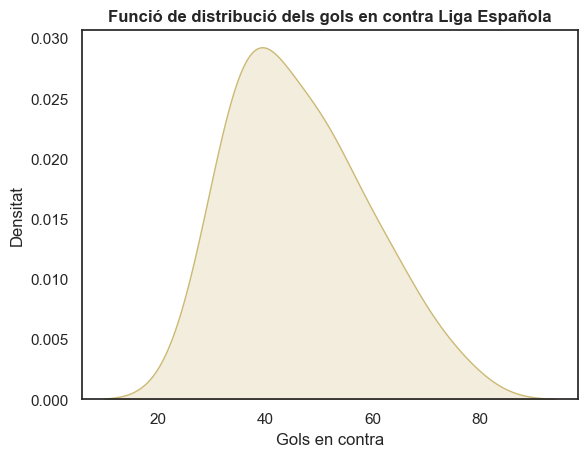

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style='white')
fig = sns.kdeplot(LigaESP['GA'], fill=True, color="y") #Funció de distribució de probabilitat.
plt.title("Funció de distribució dels gols en contra Liga Española", size=12, fontweight='bold')
plt.xlabel("Gols en contra")
plt.ylabel("Densitat")


La figura mostra com la distribució de gols en contra en la lliga Española segueix una distribució Normal (Gaussiana)

### - **Exercici 2**
Amb el mateix dataset selecciona dos altres atributs del conjunt de dades. Calcula els p-valors i digues si rebutgen la hipòtesi nul·la agafant un alfa de 5%.

Utilitzaré els atributs variables (Pts/G) i "Top Team Scorer". Primer trec, separo el atribut Top Team Scorer en dos columnes, ja que només necesito el numero i no el nom del jugador:

In [11]:
data[['Top_Team_Scorer','Goals_scored']] = data['Top Team Scorer'].str.split(' - ', n=1, expand=True)
data = data.drop(columns=['Top Team Scorer'])
data

,Rk,Squad,Country,LgRk,MP,W,D,L,GF,GA,...,Pts/G,xG,xGA,xGD,xGD/90,Last 5,Attendance,Goalkeeper,Top_Team_Scorer,Goals_scored
0,1,Manchester City,ENG,1,37,28,6,3,96,24,...,2.43,86.1,26.8,59.3,1.60,W W W W D,52739,Ederson,Kevin De Bruyne,15
1,2,Liverpool,ENG,2,36,26,8,2,89,24,...,2.39,84.6,33.1,51.4,1.43,W W W D W,53367,Alisson,Mohamed Salah,22
2,3,Real Madrid,ESP,1,37,26,7,4,80,31,...,2.30,73.0,45.8,27.2,0.73,W W L W D,40624,Thibaut Courtois,Karim Benzema,27
3,4,Bayern Munich,GER,1,34,24,5,5,97,37,...,2.26,88.1,37.1,51.0,1.50,W W L D D,33176,Manuel Neuer,Robert Lewandowski,35
4,5,Paris S-G,FRA,1,37,25,8,4,85,36,...,2.24,71.6,38.1,33.4,0.90,W D D D W,41188,Keylor Navas,Kylian Mbappé,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93,94,Bordeaux,FRA,20,37,5,13,19,48,89,...,0.76,41.3,68.5,-27.2,-0.73,D L L L D,22083,Benoît Costil,Hwang Ui-jo,11
94,95,Venezia,ITA,20,37,6,8,23,34,69,...,0.70,35.4,70.5,-35.1,-0.95,L L L W D,6705,Sergio Romero,Thomas Henry,9
95,96,Watford,ENG,19,37,6,5,26,33,75,...,0.62,37.8,64.1,-26.3,-0.71,L L L D L,20614,Ben Foster,Emmanuel Dennis,10
96,97,Norwich City,ENG,20,37,5,7,25,23,79,...,0.59,33.0,73.3,-40.4,-1.09,L L L L D,26826,Tim Krul,Teemu Pukki,11


In [12]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Rk               98 non-null     int64  
 1   Squad            98 non-null     object 
 2   Country          98 non-null     object 
 3   LgRk             98 non-null     int64  
 4   MP               98 non-null     int64  
 5   W                98 non-null     int64  
 6   D                98 non-null     int64  
 7   L                98 non-null     int64  
 8   GF               98 non-null     int64  
 9   GA               98 non-null     int64  
 10  GD               98 non-null     int64  
 11  Pts              98 non-null     int64  
 12  Pts/G            98 non-null     float64
 13  xG               98 non-null     float64
 14  xGA              98 non-null     float64
 15  xGD              98 non-null     float64
 16  xGD/90           98 non-null     float64
 17  Last 5           9

In [13]:
data["Goals_scored"]=data["Goals_scored"].astype(int)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Rk               98 non-null     int64  
 1   Squad            98 non-null     object 
 2   Country          98 non-null     object 
 3   LgRk             98 non-null     int64  
 4   MP               98 non-null     int64  
 5   W                98 non-null     int64  
 6   D                98 non-null     int64  
 7   L                98 non-null     int64  
 8   GF               98 non-null     int64  
 9   GA               98 non-null     int64  
 10  GD               98 non-null     int64  
 11  Pts              98 non-null     int64  
 12  Pts/G            98 non-null     float64
 13  xG               98 non-null     float64
 14  xGA              98 non-null     float64
 15  xGD              98 non-null     float64
 16  xGD/90           98 non-null     float64
 17  Last 5           9

Per comparar les dues distribucions, primer he d'escollir quin test utilitzo. Per això, estudio si les variables tenen distribucions normals o no, per descartar un test o un altre:

In [14]:
stat, p = shapiro(data["Goals_scored"])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
 print('Probably Gaussian')
else:
 print('Probably not Gaussian')

stat=0.883, p=0.000
Probably not Gaussian


In [15]:
stat, p = shapiro(data["Pts/G"])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
 print('Probably Gaussian')
else:
 print('Probably not Gaussian')


stat=0.972, p=0.035
Probably not Gaussian


Com bé es pot veure, les dues distribucions de les variables seleccionades no segueixen una distribució Gaussiana/Normal es per això que utilitzaré la el test d'Spearman, ja que el test de correlació de Pearson's demana que les dues mostres segueixin una distribució normal/gaussiana, i no es el cas.
Plantejament d'hipotesis:

- **Hipòtesi Nul·la (H0):** No hi ha correlació significativa entre les dues variables. Les mostres "Gols del màxim golejador" i "Punts per partit" son independents.

- **Hipòtesi Alternativa (H1):** Hi ha una correlació significativa entre les dues variables. Les mostres "Gols del màxim golejador" i "Punts per partit" son dependents.

INFORMACIÓ ADDICIONAL: La prova de Spearman s'usa per evidènciar que rebutjes la hipòtesi nul·la en favor de la hipòtesi alternativa. Si el valor p associat a la prova és inferior al nivell de significació (normalment 0.05), es rebutja la hipòtesi nul·la i es conclou que hi ha una correlació significativa entre les dues variables. Si el valor p és superior a 0.05, no hi ha prou evidència per rebutjar la hipòtesi nul·la.

In [21]:
#Spearman's Rank Correlation Test
from scipy.stats import spearmanr
p = "{:.10f}".format(p)
stat, p = spearmanr(data["Goals_scored"], data["Pts/G"])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
 print('Les dos mostres són independents')
else:
 print('Les dos mostres són dependents')

stat=0.555, p=0.000
Les dos mostres són dependents


Rebutgem la hipòtesi nul·la, i es conclou que hi ha una correlació significativa entre les dues variables.

Per veure-ho graficament:

Text(0.5, 1.0, 'Relació entre Gols marcats i Punts per Partit')

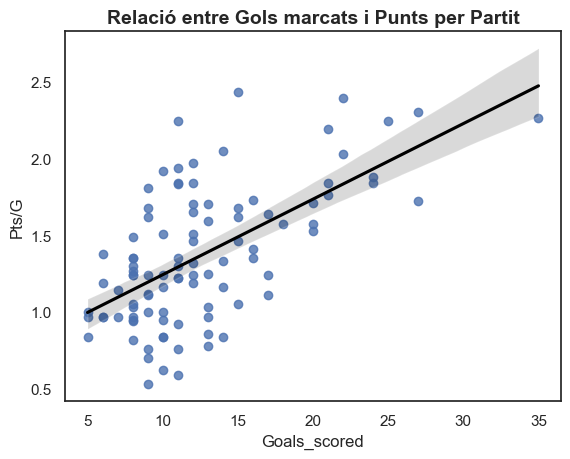

In [17]:
sns.regplot(x=data["Goals_scored"], y=data["Pts/G"], line_kws={'color': 'black'})
plt.title("Relació entre Gols marcats i Punts per Partit", size=14, fontweight='bold')

La figura superior mostra la correlació que hi ha entre les dues variables. La linia de regressió mostra la tendencia general, i els punts serien les mostres. Hi ha una certa relació entre els punts per partit i els gols del màxim golejador de l'equip.

### - **Exercici 3**
Continua amb el conjunt de dades adjunt i selecciona tres atributs del conjunt de dades. Calcula el p-valor i digues si rebutja la hipòtesi nul·la agafant un alfa de 5%.

Analitzaré si els gols esperats tenen la mateixa distribució que els gols a favor i els punts totals. Utilitzo el Test de Friedman.

- **Hipòtesi Nul·la (H0):** No hi ha diferencies significatives entre les distribucions dels tres atributs seleccionats.
- **Hipòtesi Alternativa (H1):** Hi ha diferencies significatives entre almenys dues distribucions dels 3 atributs seleccionats.

In [18]:
# Example of the Friedman Test
from scipy.stats import friedmanchisquare
data1 = data['GF']
data2 = data['Pts']
data3 = data['xG']
stat, p = friedmanchisquare(data1, data2, data3)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably the same distribution')
else:
	print('Probably different distributions')

stat=3.943, p=0.139
Probably the same distribution


Com que el p-valor(p=0.139) és major que 0,05, s'accepta la hipòtesis nul·la. Per tant, concloem que no hi ha diferencies significatives entre les distribucions.

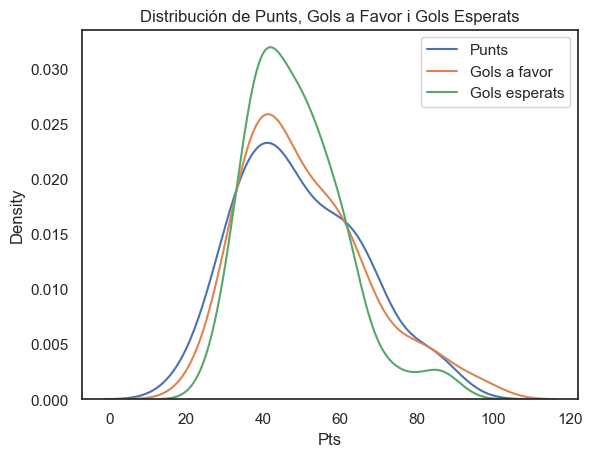

In [19]:
sns.kdeplot(data["Pts"], label="Punts")
sns.kdeplot(data["GF"], label="Gols a favor")
sns.kdeplot(data["xG"], label="Gols esperats")
plt.legend()
plt.title("Distribución de Punts, Gols a Favor i Gols Esperats")
plt.show()

Com bé s'observa a la figura superior, les tres distribucions son molt semblants.